## Lista 4
## Maciej Karczewski

## Zad 1

Zaimplementuj kolejkę przy użyciu pythonowych list w taki sposób,
aby:
- koniec kolejki znajdował się na końcu listy,
- koniec kolejki znajdował się na początku listy.

In [2]:

class QueueBaB(object):
    """
    Klasa implementująca kolejkę za pomocą pythonowej listy tak,
    że początek kolejki jest przechowywany na początku listy.
    """
  
    def __init__(self):
        self.list_of_items = []

    def enqueue(self, item):
        """
        Metoda służąca do dodawania obiektu do kolejki.
        Pobiera jako argument obiekt który ma być dodany.
        Niczego nie zwraca.
        """
        self.list_of_items.append(item)

    def dequeue(self):
        """
        Metoda służąca do ściągania obiektu do kolejki.
        Nie pobiera argumentów.
        Zwraca ściągnięty obiekt.
        """
        return self.list_of_items.pop(0)

    def is_empty(self):
        """
        Metoda służąca do sprawdzania, czy kolejka jest pusta.
        Nie pobiera argumentów.
        Zwraca True jeśli kolejka jest pusta lub False gdy nie jest.
        """
        return len(self.list_of_items) == 0


    def size(self):
        """
        Metoda służąca do określania wielkości kolejki.
        Nie pobiera argumentów.
        Zwraca liczbę obiektów w kolejce.
        """
        return len(self.list_of_items)

    def __str__(self):
        """
        Metoda służąca do wypisania kolejki
        """
        return str(self.list_of_items)
      
    
class QueueBaE(object):
    """
    Klasa implementująca kolejkę za pomocą pythonowej listy tak,
    że początek kolejki jest przechowywany na końcu listy.
    """

    def __init__(self):
        self.list_of_items = []

    def enqueue(self, item):
        """
        Metoda służąca do dodawania obiektu do kolejki.
        Pobiera jako argument obiekt który ma być dodany.
        Niczego nie zwraca.
        """
        self.list_of_items.insert(0, item)

    def dequeue(self):
        """
        Metoda służąca do ściągania obiektu do kolejki.
        Nie pobiera argumentów.
        Zwraca ściągnięty obiekt.
        """
        return self.list_of_items.pop()

    def is_empty(self):
        """
        Metoda służąca do sprawdzania, czy kolejka jest pusta.
        Nie pobiera argumentów.
        Zwraca True jeśli kolejka jest pusta lub False gdy nie jest.
        """
        return len(self.list_of_items) == 0


    def size(self):
        """
        Metoda służąca do określania wielkości kolejki.
        Nie pobiera argumentów.
        Zwraca liczbę obiektów w kolejce.
        """
        return len(self.list_of_items)

    def __str__(self):
        """
        Metoda służąca do wypisania kolejki
        """
        return str(self.list_of_items)


Kolejka ma metody które pozwalają na dodanie do kolejki usunięcie elementu z niej, sprawdzenie czy jest pusta, sprawdzenie jej rodzaju

- początek kolejki jest przechowywany na początku listy

In [3]:
queue = QueueBaB()
print(queue.is_empty())
print(queue.size())
queue.enqueue(1)
queue.enqueue(2)
queue.enqueue(3)
print(queue)
print(queue.is_empty())
print(queue.size())
queue.dequeue()
print(queue)


True
0
[1, 2, 3]
False
3
[2, 3]


- początek kolejki jest przechowywany na końcu listy

In [4]:
queue = QueueBaE()
print(queue.is_empty())
print(queue.size())
queue.enqueue(1)
queue.enqueue(2)
queue.enqueue(3)
print(queue)
print(queue.is_empty())
print(queue.size())
queue.dequeue()
print(queue)


True
0
[3, 2, 1]
False
3
[3, 2]


## Zad 2

Zaprojektuj i przeprowadź eksperyment porównujący wydajność obu
implementacji.


- Eksperyment będzie polegał na sprawdzeniu czasów stworzenia kolejki danej długości, drugim testem będzie czas opróżnienia kolejki o danej długości, a ostatni roztrzygający to będzie czas stworzenia kolejki o danej długości i opróżnienie jej.

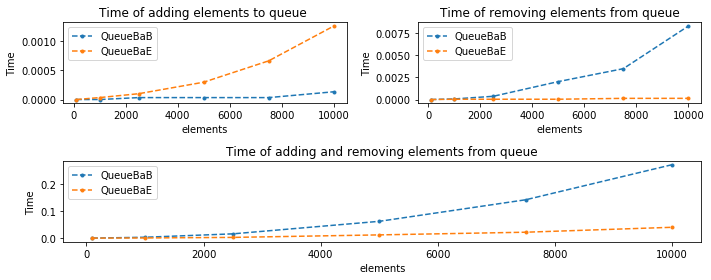

In [5]:
import time
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import copy

def time_add_to_queue(kind_of_queue, number_of_ele = 10000 ,repits = 30):
    times = []
    for n in range(repits):
        queue = kind_of_queue()
        start = time.time() 
        for i in range(number_of_ele):
            queue.enqueue(i)
        end = time.time() 
    times.append(end - start)
    return sum(times) / repits

def time_delate_from_queue(kind_of_queue, number_of_ele = 10000 ,repits = 30):
    times = []
    queue = kind_of_queue()
    for i in range(number_of_ele ):
        queue.enqueue(i)
    for n in range(repits):
        nowa_queue = copy.deepcopy(queue)
        start = time.time()
        for i in range(number_of_ele):
            nowa_queue.dequeue()
        end = time.time()
    times.append(end - start)
    return sum(times) / repits

def time_delate_from_and_add_queue(kind_of_queue, number_of_ele = 10000 ,repits = 30):
    times = []
    for n in range(repits):
        start = time.time()
        queue = kind_of_queue()
        for i in range(number_of_ele):
            queue.enqueue(i)
        for i in range(number_of_ele):
            queue.dequeue()
        end = time.time()
        times.append(end - start)
    return sum(times) / repits

args = [100, 1000,2500, 5000, 7500, 10000]
fig  = plt.subplots(figsize=(10, 4))
G = gridspec.GridSpec(2, 2)
ax1 = plt.subplot(G[0, 0])
ax1.plot(args, [time_add_to_queue(QueueBaB, n) for n in args], label = "QueueBaB" , marker = '.', linestyle = '--' )
ax1.plot(args, [time_add_to_queue(QueueBaE, n) for n in args], label = "QueueBaE" , marker = '.', linestyle = '--')
ax1.set_title("Time of adding elements to queue ")
ax1.legend()
ax1.set_xlabel("elements")
ax1.set_ylabel("Time")
ax2 = plt.subplot(G[0,1])
ax2.plot(args, [time_delate_from_queue(QueueBaB, n) for n in args], label = "QueueBaB" , marker = '.', linestyle = '--' )
ax2.plot(args, [time_delate_from_queue(QueueBaE, n) for n in args], label = "QueueBaE" , marker = '.', linestyle = '--')
ax2.set_title("Time of removing elements from queue")
ax2.legend()
ax2.set_xlabel("elements")
ax2.set_ylabel("Time")
ax3 = plt.subplot(G[1,:])
ax3.plot(args, [time_delate_from_and_add_queue(QueueBaB, n) for n in args], label = "QueueBaB" , marker = '.', linestyle = '--' )
ax3.plot(args, [time_delate_from_and_add_queue(QueueBaE, n) for n in args], label = "QueueBaE" , marker = '.', linestyle = '--')
ax3.set_title("Time of adding and removing elements from queue")
ax3.legend()
ax3.set_xlabel("elements")
ax3.set_ylabel("Time")
plt.tight_layout()
plt.show()


- Widać, że kolejka mająca początek na początku listy jest szybsza w dodawaniu elementów ,ale wolniejsza w ich usuwaniu
- Końcowo porównując czasy dodawania a następnie usuwania elementów widać, że kolejka o początku na początku listy jest wolniejsza od kolejki mającej początek na końcu listy
- Podsumowując kolejka mająca początek na końcu listy jest szybsza

## Zad 3 
Rozważ sytuację z życia wziętą.Postaw pytanie badawcze. Wykorzystując liniowe struktury danych zaprojektuj i przeprowadź symulację, która udzieli na nie odpowiedzi. Pamiętaj
o określeniu wszystkich uproszczeń swojego modelu.

### Ile koszyków ustawionych w stos potrzeba aby nie zabrakło ich w sklepie do którego przychodzi średnio 6 klientów na minutę a każdy z nich wybiera produkty od  2 minut do 30 minut a następnie stoi w kolejce która obsługuje średnio 8 klientów w minutę? Po skasowaniu produktów koszyk wraca na stos koszyków. Zakładamy że czas kasowania produktów nie zależy od czasu spędzonego na ich wybieraniu, a ilość klientów od pory dnia a czas otwarcia sklepu to 18 godzin 

- Do rozwiązania tego problemu wykorzystam stos(koszyki) oraz kolejkę(kolejka do kasy)
- Na początku stworzę klasę Client oraz klasę Cart, która będzie zwykłym stosem tylko, że przy tworzeniu będzie mieć już określoną ilość koszyków
- Kiedy klient przychodzi do sklepu bierze koszyk ze stosu i ma go do czasu gdy skończy wybierać produkty i gdy zostaną jego produkty skasowane, następnie koszyk wraca na stos
- Wynik jest wartością maksymalną z 10 dni

In [7]:
import random

class Stack: # klasa z wykładu 
    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def push(self, item):
        self.items.append(item)

    def pop(self):
        return self.items.pop()

    def peek(self):
        return self.items[len(self.items)-1]

    def size(self):
        return len(self.items)
      
    def __str__(self):
        return str(self.items)

class Client():
    def __init__(self):
        self.shopping_time = random.randint(1200, 18000)

    def get_shopping_time(self):
        return self.shopping_time
        
    def tick(self):
        self.shopping_time -= 1

class Cart(Stack):
    def __init__(self, number ):
        super().__init__()
        self.items = [ 1 for  n in range(number) ]


def symulation(time):
    cart = Cart(2000)
    queue = QueueBaE()
    clients = []
    amout_of_carts = []
    for tick in range(time):
        if random.randint(1, 10) == 10 :
            cart.pop()
            clients.append(Client())
        for client in clients:
            client.tick()
            if client.get_shopping_time() == 0 :
                queue.enqueue(client)
        clients = [client for client in clients if client.get_shopping_time() != 0]
        if queue.is_empty() == False and random.random() < 8/60  :
            queue.dequeue()
            cart.push(1)

        amout_of_carts.append(cart.size())
        
    return 2000 - min(amout_of_carts)

time = 3600 *18
amout_of_carts_req = symulation( time)
for i in range(10):
    n = symulation(time) 
    if n > amout_of_carts_req:
        amout_of_carts_req = n    
print(amout_of_carts_req)

1053


### Potrzeba około 1053 koszyków

## Zad 4
Napisz program, który sprawdzi poprawność składni dokumentu HTML
pod kątem brakujących znaczników zamykających.


- Wykorzystam stos do tego
- Znaczniki wyłowię za pomocą HTMLParser, który dostosuję do swoich potrzeb tzn jak spotka znacznik otwierający lub zamykający to go dodaje do listy znaczników w tekście jeśli nie jest tylko znacznikiem nie wymagającym domknięcia
- Znaczniki otwierający wrzucam na stos a usuwam go jak jest zamykający, jeśli znaczniki się niezgadzają lub stos jest pusty to zwracam false co oznacza brak poprawności

In [9]:
from html.parser import HTMLParser
def checking_HTML_correctness(filename):
    """
    Funkcja ma za zadanie sprawdzać poprawność składni dokumentu HTML.
    Jako argument przyjmuje nazwę pliku, który ma sprawdzić.
    Zwraca True jeśli dokument jest poprawny składniowo i False jeśli nie jest.
    """
    without_close = ['link' ,'meta', 'BR' ,'br', 'img', 'hr' ]

    class Parse(HTMLParser):
        def __init__(self) :
            super().__init__()
            self.tags = []

        def handle_starttag(self, tag, attrs):
            if tag not in without_close:
                self.tags.append(tag)

        def handle_endtag(self, tag):
            if tag not in without_close:
                self.tags.append("/" + str(tag))
        
        def catched_tags(self):
            return self.tags


    stack = Stack()
    file_obj = open(filename, 'r')
    text = file_obj.read()
    parser = Parse()
    parser.feed(text)
    tags = parser.catched_tags()


    for tag in tags :
        if '/' not in tag:
              stack.push(tag)
        else:
            try:
                if tag.replace('/','') != stack.pop():
                      return False
            except:
                return False
    return True

print(checking_HTML_correctness("C:\\Users\\mkarc\\studia\\AISD\\lista4\\L4_ZAD4_sampleHTML_1.txt"))
print(checking_HTML_correctness("C:\\Users\\mkarc\\studia\\AISD\\lista4\\L4_ZAD4_sampleHTML_2.txt"))
print(checking_HTML_correctness("C:\\Users\\mkarc\\studia\\AISD\\lista4\\L4_ZAD4_sampleHTML_3.txt"))

True
False
True


## Zad 5
Dodaj brakujące metody do klasy UnorderedList prezentowanej na
wykładzie.

- metoda append wywołuje insert na miejsce końcowe
- funkcja pop , insert działa także dla indeksów ujemnych
- dodałem atrybut lenght w funkcji init
- przeciążyłem metodę str dla sprawdzenia działania oraz metodę getitem która zwraca element o danym indeksie (przyda się w zadaniu nr 6)

In [2]:
class Node:
  
    def __init__(self,init_data):
        self.data = init_data
        self.next = None

    def get_data(self):
        return self.data

    def get_next(self):
        return self.next

    def set_data(self,new_data):
        self.data = new_data

    def set_next(self,new_next):
        self.next = new_next

    def __str__(self) :
        return str(self.data)

class UnorderedList(object):
  
    def __init__(self):
        self.head = None
        self.lenght = 0

    def is_empty(self):
        return self.head == None

    def add(self, item):
        temp = Node(item)
        temp.set_next(self.head)
        self.head = temp
        self.lenght += 1

    def size(self):
        return self.lenght

    def search(self,item):
        current = self.head
        found = False
        while current != None and not found:
            if current.get_data() == item:
                found = True
            else:
                current = current.get_next()
        return found

    def remove(self, item):
        current = self.head
        previous = None
        found = False
        while not found:
            if current.get_data() == item:
                found = True
            else:
                previous = current
                current = current.get_next()
                if current == None:
                    return 

        if previous == None:                  #jeśli usuwamy pierwszy element
            self.head = current.get_next()
        else:
            previous.set_next(current.get_next())

        self.lenght -= 1

    def append(self, item):
        """
        Metoda dodająca element na koniec listy.
        Przyjmuje jako argument obiekt, który ma zostać dodany.
        Niczego nie zwraca.
        """
        self.insert(-1,item)

    def index(self, item):
        """
        Metoda podaje miejsce na liście, 
        na którym znajduje się określony element - 
        element pod self.head ma indeks 0.
        Przyjmuje jako argument element, 
        którego pozycja ma zostać określona.
        Zwraca pozycję elementu na liście lub None w przypadku, 
        gdy wskazanego elementu na liście nie ma.
        """
        current = self.head
        for n in range(0,self.lenght):
            if current.get_data() == item:
                return n
            else:
                current = current.get_next()


    def insert(self, pos, item):
        """
        Metoda umieszcza na wskazanej pozycji zadany element.
        Przyjmuje jako argumenty pozycję, 
        na której ma umiescić element oraz ten element.
        Niczego nie zwraca.
        Rzuca wyjątkiem IndexError w przypadku, 
        gdy nie jest możliwe umieszczenie elementu
        na zadanej pozycji (np. na 5. miejsce w 3-elementowej liście).
        """
        if pos < 0 :
            pos = self.lenght + pos + 1

        if pos > self.lenght or pos < 0:
            raise IndexError("This index don't exist")

        current = self.head
        for n in range(pos -1):
            current = current.get_next()
        if pos == 0 :
            self.head = Node(item)
            self.head.set_next(current)
        else:
            temp = Node(item)
            temp.set_next(current.get_next())
            current.set_next(temp)
        self.lenght += 1


    def pop(self, pos=-1):
        """
        Metoda usuwa z listy element na zadaniej pozycji.
        Przyjmuje jako opcjonalny argument pozycję, 
        z której ma zostać usunięty element.
        Jeśli pozycja nie zostanie podana, 
        metoda usuwa (odłącza) ostatni element z listy. 
        Zwraca wartość usuniętego elementu.
        Rzuca wyjątkiem IndexError w przypadku,
        gdy usunięcie elementu z danej pozycji jest niemożliwe.
        """
        if self.lenght == 0:
            raise IndexError("List is empty!")
        if pos < 0 :
            pos = self.lenght + pos + 1

        if pos > self.lenght or pos < 0:
            raise IndexError("This index don't exist")

        current = self.head
        previous = None
        for n in range(pos - 1):
            previous = current
            current = current.get_next()

        if pos == 0 or self.lenght == 1:
            self.head = current.get_next()
        else:
            previous.set_next(current.get_next())

        self.lenght -= 1
        return current.get_data()

    def __str__(self):
        current = self.head
        li = []
        while current != None:
            li.append(current.get_data())
            current = current.get_next()
        s = ("[" + ', '.join(['{}']*len(li))+"]") 
        return s.format(*li)

    def __getitem__(self, pos):
        if pos < 0 :
            pos = self.lenght + pos 

        if pos > self.lenght or pos < 0:
            raise IndexError("This index don't exist")

        current = self.head
        for n in range(pos):
            current = current.get_next()

        return current.get_data()

In [3]:
lista = UnorderedList()
lista.add(1)
lista.add(2)
lista.add(5)
print(lista.search("c"))
print(lista)
lista.add(7)
print(lista)
print(lista.index(5))
lista.insert(1,10)
print(lista)
print(lista.pop(3))
print(lista)
lista2 = UnorderedList()
print(lista2.index(1))
lista2.append(11)
print(lista2)
lista.append(13)
print(lista)
print(lista[1])
lista2.pop()
print(lista2)
lista2.append(11)
print(lista2[0])
  

False
[5, 2, 1]
[7, 5, 2, 1]
1
[7, 10, 5, 2, 1]
5
[7, 10, 2, 1]
None
[11]
[7, 10, 2, 1, 13]
10
[]
11


## zad 6
Zaimplementuj stos przy pomocy listy jednokierunkowej

- Wykorzystuje tu zadanie 5

In [4]:
class StackUsingUL(object):
    def __init__(self):
        self.items = UnorderedList()

    def is_empty(self):
        """
        Metoda sprawdzajacą, czy stos jest pusty.
        Nie pobiera argumentów.
        Zwraca True lub False.
        """
        return self.items.is_empty()

    def push(self, item):
        """
        Metoda umieszcza nowy element na stosie.
        Pobiera element, który ma zostać umieszczony.
        Niczego nie zwraca.
        """
        self.items.append(item)

    def pop(self):
        """
        Metoda ściąga element ze stosu.
        Nie przyjmuje żadnych argumentów.
        Zwraca ściągnięty element.
        Jeśli stos jest pusty, rzuca wyjątkiem IndexError.
        """
        return self.items.pop()

    def peek(self):
        """
        Metoda podaje wartość elementu na wierzchu stosu
        nie ściągajac go.
        Nie pobiera argumentów.
        Zwraca wierzchni element stosu.
        Jeśli stos jest pusty, rzuca wyjątkiem IndexError.
        """
        return self.items[-1]

    def size(self):
        """
        Metoda zwraca liczę elementów na stosie.
        Nie pobiera argumentów.
        Zwraca liczbę elementów na stosie.
        """
        return self.items.size()

In [5]:
stack = StackUsingUL()
stack.push(7)
print(stack.size())
print(stack.peek())
print(stack.pop())
print(stack.size())
print(stack.is_empty())
stack.push(5)
stack.push(6)
print(stack.size())
print(stack.peek())
print(stack.pop())
print(stack.size())
print(stack.is_empty())

1
7
7
0
True
2
6
6
1
False


## Zad 7
Zaimplementuj kolejkę dwustronną przy pomocy listy jednokierunkowej.

In [11]:
class DequeueUsingUL(object):

    def __init__(self):
        self.items = UnorderedList()

    def is_empty(self):
        """
        Metoda sprawdzajacą, czy kolejka jest pusta.
        Nie pobiera argumentów.
        Zwraca True lub False.
        """
        return self.items.is_empty()

    def add_left(self, item):
        """
        Metoda dodaje element do kolejki z lewej strony.
        Pobiera jako argument element, który ma zostać dodany.
        Niczego nie zwraca.
        """
        self.items.add(item)

    def add_right(self, item):
        """
        Metoda dodaje element do kolejki z prawej strony.
        Pobiera jako argument element, który ma zostać dodany.
        Niczego nie zwraca.
        """
        self.items.append(item)

    def remove_left(self):
        """
        Metoda usuwa element z kolejki z lewej strony.
        Nie pobiera argumentów.
        Zwraca usuwany element.
        W przypadku pustej kolejku rzuca wyjątkiem IndexError
        """
        return self.items.pop(0)

    def remove_right(self):
        """
        Metoda usuwa element z kolejki z prawej strony.
        Nie pobiera argumentów.
        Zwraca usuwany element.
        W przypadku pustej kolejku rzuca wyjątkiem IndexError
        """
        return self.items.pop()

    def size(self):
        """
        Metoda zwraca liczę elementów na w kolejce.
        Nie pobiera argumentów.
        Zwraca liczbę elementów na w kolejce.
        """
        return self.items.size()

    def __str__(self):
        return str(self.items)

In [21]:
queue = DequeueUsingUL()
print(queue.is_empty())
queue.add_left(1)
queue.add_left(2)
print(queue)
queue.add_right(3)
print(queue)
print('rozmiar ' + str(queue.size()) )
print(queue.remove_left())
print(queue)
print(queue.remove_right())
print(queue)
print(queue.is_empty())

True
[2, 1]
[2, 1, 3]
rozmiar 3
2
[1, 3]
3
[1]
False


## Zad 8
Zaprojektuj i przeprowadź eksperyment porównujący wydajność listy
jednokierunkowej i listy wbudowanej w Pythona.


- eksperymet będzie składał się z twóch testów: pierwszy czas dodawania n elementów do pustej listy , drugi to czas usuwania n elementów z listy o rozmiarze n

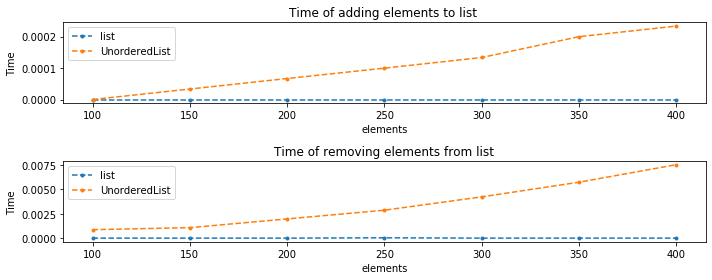

In [26]:
import time
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def time_add_to_list(kind_of_list, number_of_ele = 10000 ,repits = 30):
    times = []
    for n in range(repits):
        li = kind_of_list()
        start = time.time() 
        for i in range(number_of_ele):
            li.append(i)
        end = time.time() 
    times.append(end - start)
    return sum(times) / repits


def time_delate_from_list(kind_of_list, number_of_ele = 10000 ,repits = 30):
    times = []
    for n in range(repits):
        start = time.time()
        li = kind_of_list()
        for i in range(number_of_ele ):
            li.append(i)
        start = time.time()
        for i in range(number_of_ele):
            li.pop()
        end = time.time()
        times.append(end - start)
    return sum(times) / repits

args = [100, 150, 200, 250, 300, 350, 400]
fig  = plt.subplots(figsize=(10, 4))
G = gridspec.GridSpec(2, 1)
ax1 = plt.subplot(G[0, 0])
ax1.plot(args, [time_add_to_list(list, n) for n in args], label = "list" , marker = '.', linestyle = '--' )
ax1.plot(args, [time_add_to_list(UnorderedList, n) for n in args], label = "UnorderedList" , marker = '.', linestyle = '--')
ax1.set_title("Time of adding elements to list ")
ax1.legend()
ax1.set_xlabel("elements")
ax1.set_ylabel("Time")
ax2 = plt.subplot(G[1,0])
ax2.plot(args, [time_delate_from_list(list, n) for n in args], label = "list" , marker = '.', linestyle = '--' )
ax2.plot(args, [time_delate_from_list(UnorderedList, n) for n in args], label = "UnorderedList" , marker = '.', linestyle = '--')
ax2.set_title("Time of removing elements from list")
ax2.legend()
ax2.set_xlabel("elements")
ax2.set_ylabel("Time")
plt.tight_layout()
plt.show()

- Z wykresów jasno wynika, że listajednokierunkowa jest znacząco wolniejsza od tej wbudowanej

## Kod 
https://github.com/maciejkar/lista4.git